# 8. Visualizing Combined Results

## 8.1 Imports

In [1]:
library(tidyverse)
library(ggimage)
library(ggrepel)
library(here)

source(here("R", "00_source.R"))

gunnerExYds <- read.csv(here("data", "gunner_stats_exYds.csv"), 
                        na.strings = c('NA', NA, '', ' '))

gunnerFCL <- read.csv(here("data", "gunner_stats_FCP.csv"), 
                      na.strings = c('NA', NA, '', ' '))

# join dataframes
gunnerStats <- cbind(gunnerExYds, FCP = gunnerFCL$FCP)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at C:/Users/Hunter



## 8.2 Inverse Fair Catch Probability
To make the chart easier to read, I am going to plot the inverse of the probability of causing a fair catch, which is the probability of allowing a return. This way both statistics can be read the same way (lower number is good, higher number is bad)  

In [2]:
gunnerStats$returnProb <- (1 - gunnerStats$FCP)

## 8.3 Visualization
Combining these two measurements, some of the best gunners between the 2018-2020 seasons were Justin Bethel, Mack Hollins, Tavierre Thomas, and Matthew Slater.

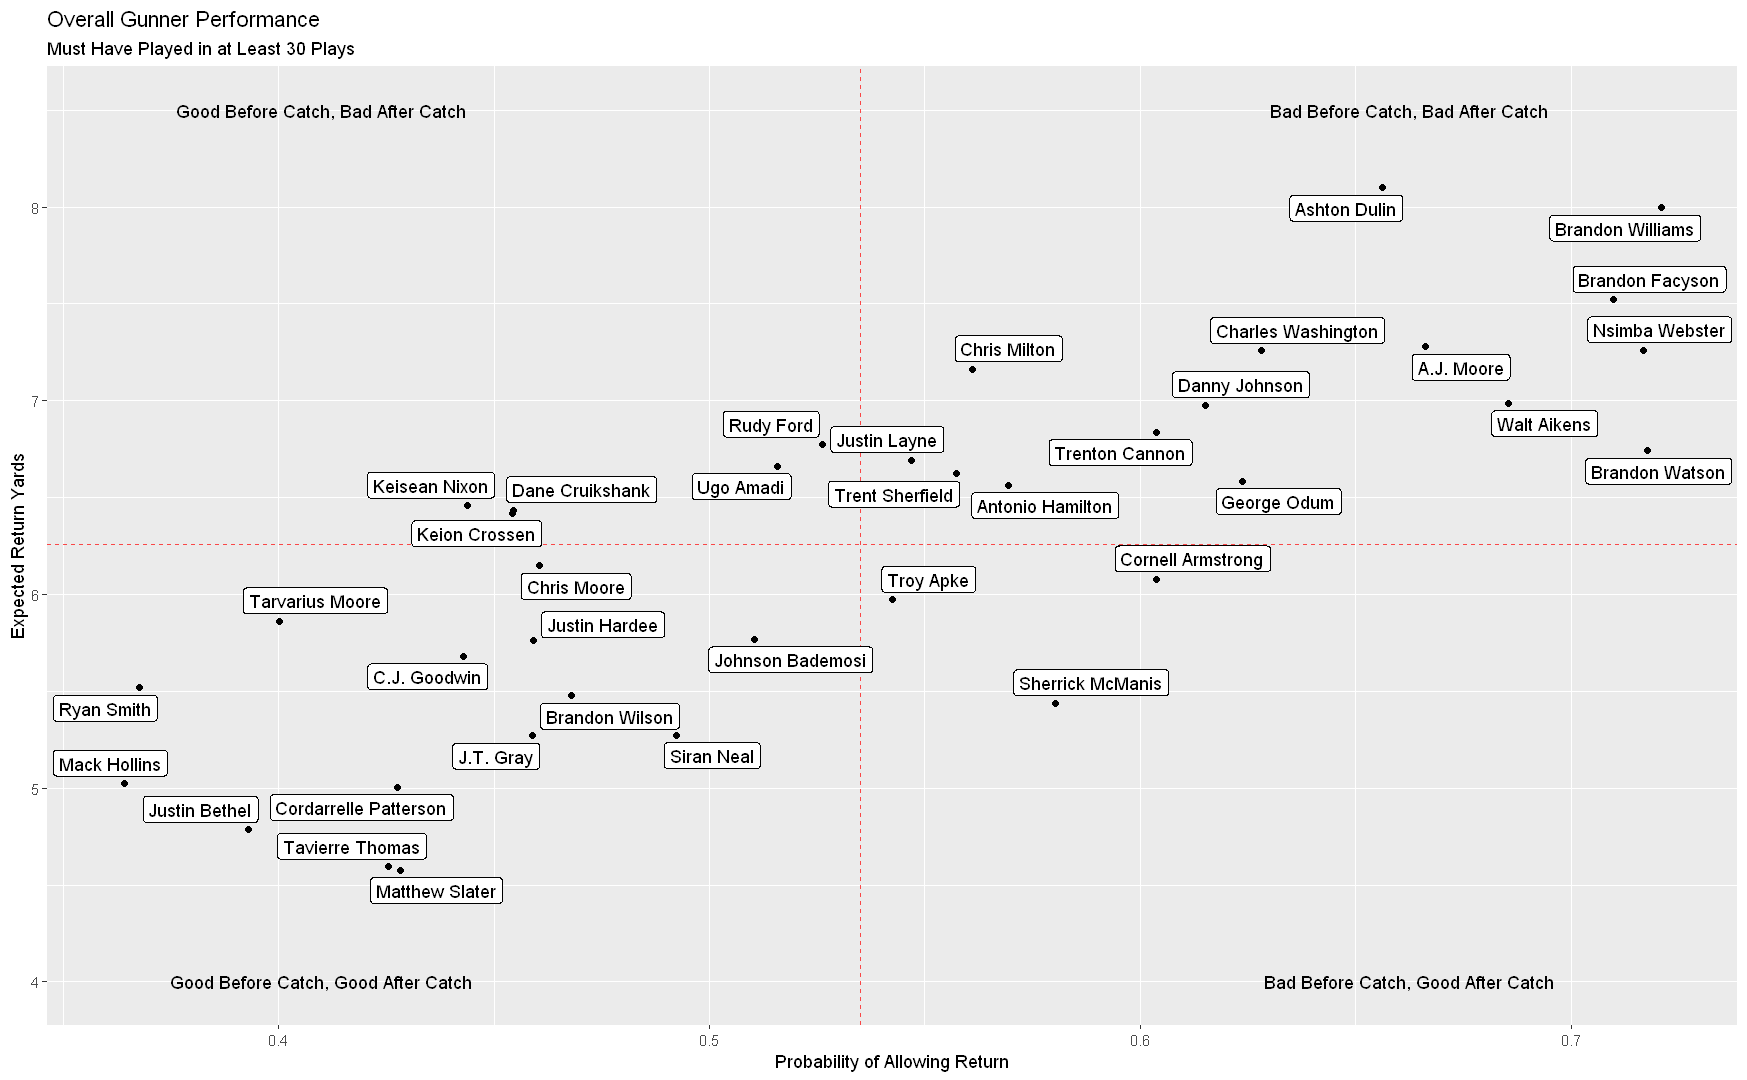

In [3]:
# adjust plot size
options(repr.plot.width=14.5623, repr.plot.height=9)

ggplot() +
  geom_point(data = gunnerStats, aes(x = returnProb, y = exReturnYds)) +
  geom_vline(xintercept = mean(gunnerStats$returnProb), color = 'red', alpha = 0.7, linetype = 'dashed') +
  geom_hline(yintercept = mean(gunnerStats$exReturnYds), color = 'red', alpha = 0.7, linetype = 'dashed') +
  annotate('text', x = 0.41, y = 8.5, label = 'Good Before Catch, Bad After Catch') +
  annotate('text', x = 0.41, y = 4, label = 'Good Before Catch, Good After Catch') +
  annotate('text', x = 0.6625, y = 8.5, label = 'Bad Before Catch, Bad After Catch') +
  annotate('text', x = 0.6625, y = 4, label = 'Bad Before Catch, Good After Catch') +
  geom_label_repel(data = gunnerStats, aes(x = returnProb, y = exReturnYds, label = gunnerName)) +
  labs(title = 'Overall Gunner Performance', subtitle = 'Must Have Played in at Least 30 Plays') +
  xlab('Probability of Allowing Return') +
  ylab('Expected Return Yards')

## 8.4 Save Plot

In [4]:
ggsave("final_vis.png", path = here("output"), width = 9.7082, height = 6)